# **Harsh Raj A**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
sns.set()

In [ ]:
train_data = pd.read_csv('/content/bottle(reduced).csv')

In [ ]:
train_data.describe()

,Unnamed: 0,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
count,750.00000,750.000000,750.00000,750.000000,748.000000,727.000000,0.0,725.000000,0.0,0.0,...,0.0,750.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,374.50000,12.661333,375.50000,328.596000,8.226537,33.618971,NaN,26.102332,NaN,NaN,...,NaN,331.084000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,216.65064,7.056512,216.65064,347.151846,3.108771,0.527919,NaN,0.851628,NaN,NaN,...,NaN,350.294162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00000,1.000000,1.00000,0.000000,2.780000,32.630000,NaN,24.725000,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,187.25000,7.000000,188.25000,50.000000,5.297500,33.150000,NaN,25.185000,NaN,NaN,...,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,374.50000,12.500000,375.50000,183.500000,8.355000,33.730000,NaN,26.234000,NaN,NaN,...,NaN,184.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,561.75000,19.000000,562.75000,510.500000,10.882500,34.089500,NaN,26.888000,NaN,NaN,...,NaN,514.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,749.00000,25.000000,750.00000,1352.000000,14.000000,34.470000,NaN,27.450000,NaN,NaN,...,NaN,1365.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_data.shape

(750, 75)

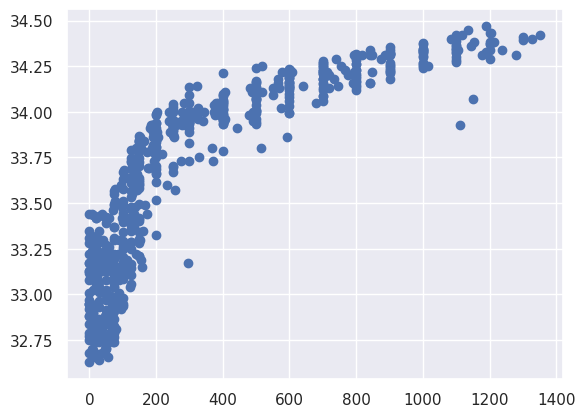

In [ ]:
plt.scatter(train_data['Depthm'],train_data['Salnty'])

<ipython-input-59-6b9777821b61>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')


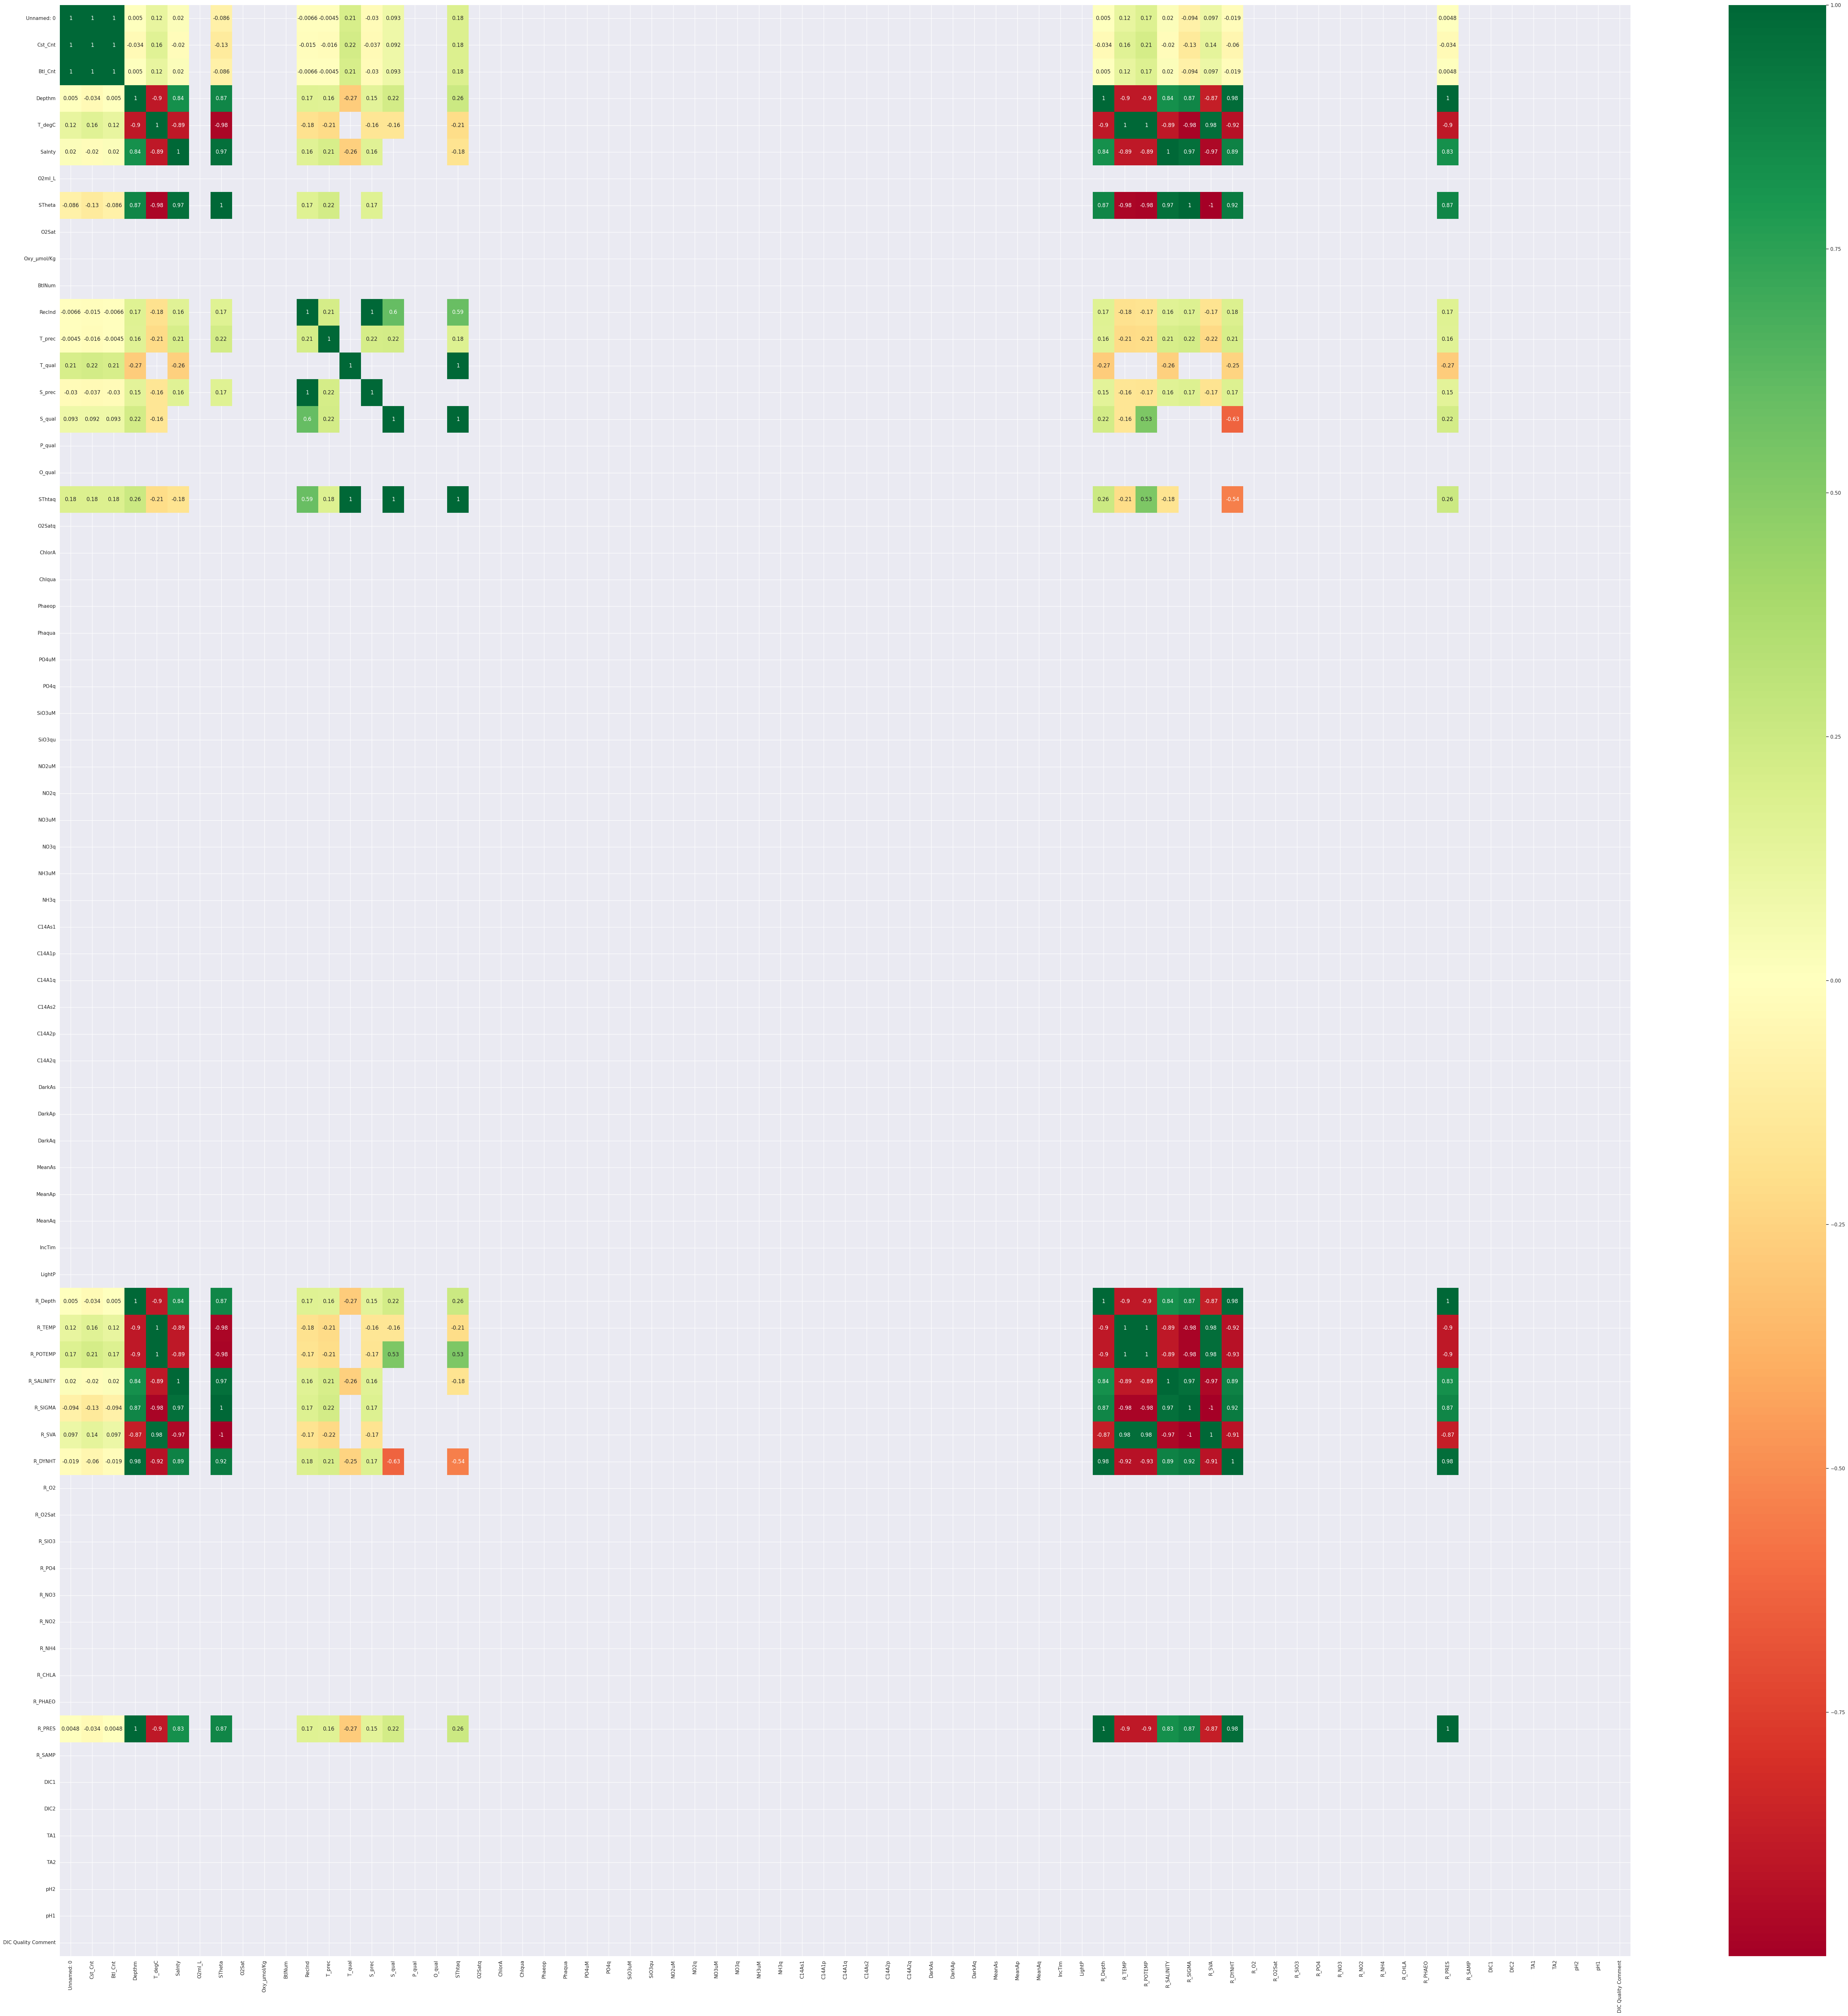

In [ ]:
plt.figure(figsize=(80,80))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

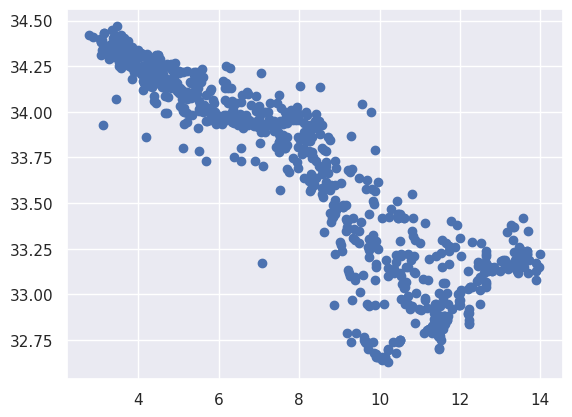

In [ ]:
plt.scatter(train_data['T_degC'],train_data['Salnty'])

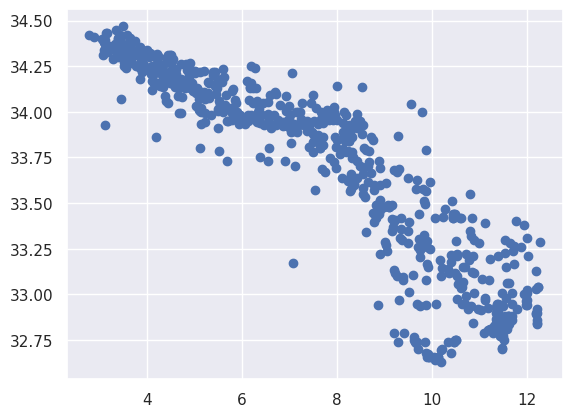

In [ ]:
train_data = train_data.drop(np.where(train_data['T_degC']>=12.3)[0])
train_data.drop_duplicates(subset=['T_degC','Salnty'], keep='first',inplace=True)
plt.scatter(train_data['T_degC'],train_data['Salnty'])

In [ ]:
train_data1 = train_data[['T_degC','Salnty']]
train_data1.dropna(inplace=True)

<ipython-input-62-761fda374971>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1.dropna(inplace=True)


In [ ]:
x = np.array(train_data1['T_degC']).reshape(-1,1)
y = np.array(train_data1['Salnty']).reshape(-1,1)

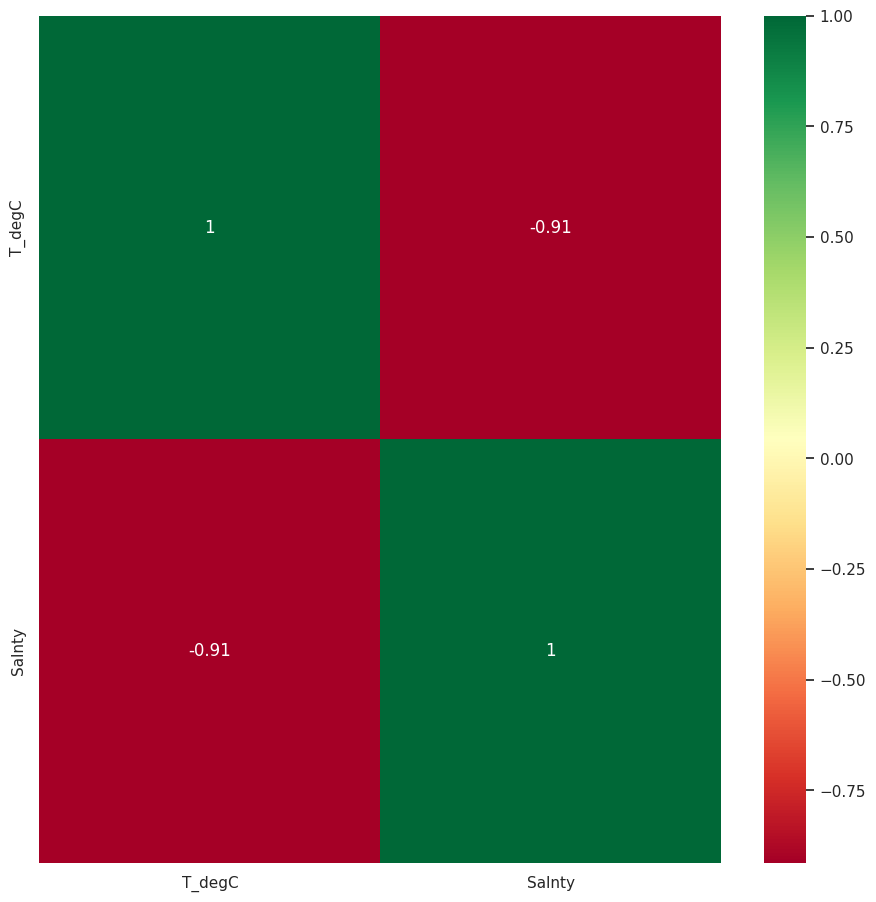

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(train_data1.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [ ]:
y = train_data1[['Salnty']]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=35,test_size=0.3)

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
y_pred= rf_reg.predict(x_test)
print("Accuracy on Traing set: ",rf_reg.score(x_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(x_test,y_test))

Accuracy on Traing set:  0.9576029381586286
Accuracy on Testing set:  0.8561451740239204


<ipython-input-67-f95e8ad8645e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x_train, y_train)


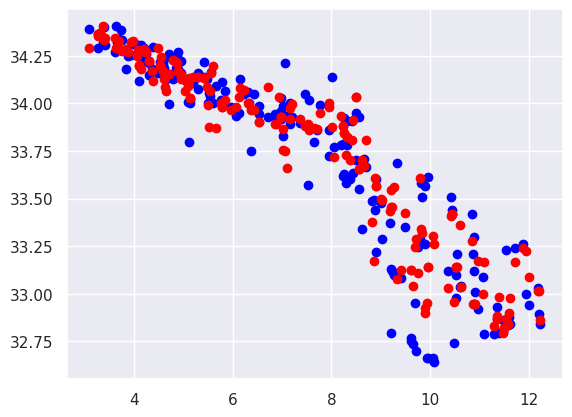

In [ ]:
plt.scatter(x_test,y_test,c='blue')
plt.scatter(x_test,y_pred,c='red')

# Linear Regression

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict_train = model.predict(x_train)
y_predict_test  = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_train,y_predict_train)*100)
print(r2_score(y_test,y_predict_test)*100)

83.31460056517813
83.33650852954531


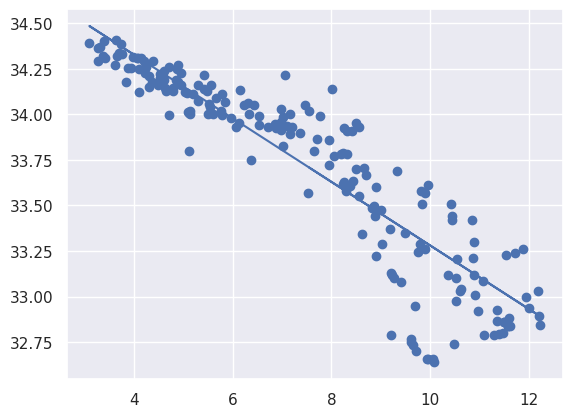

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict_test)

# Neural Network

In [ ]:
model = Sequential(
    [
        Dense(units = 16 , activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.3)),
        Dense(units = 8 , activation = 'relu',kernel_regularizer= tf.keras.regularizers.l2(0.2)),
        Dense(units = 4, activation = 'relu'),
        Dense(units = 2, activation = 'relu'),
        Dense(units = 1 , activation = 'linear')
    ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='mean_squared_error')
model.fit(
    x_train,
    y_train,
    epochs = 800
)

In [ ]:
y_predict_train = model.predict(x_train)
y_predict_test  = model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_train,y_predict_train)*100)
print(r2_score(y_test,y_predict_test)*100)

84.68373080749402
83.2290179362106


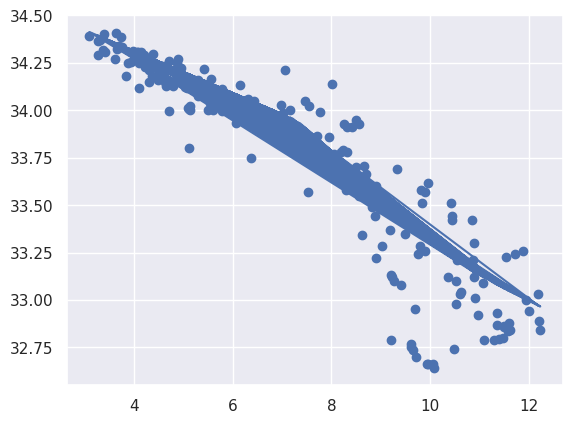

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict_test)